# 概要
鍵ステータス情報の異常値検出がメインタスク．  
ここでは，$k$-means法により鍵ステータス情報をクラスタリングする．

## KDD Cup 1999(SMTP)のデータセットを用いたテスト

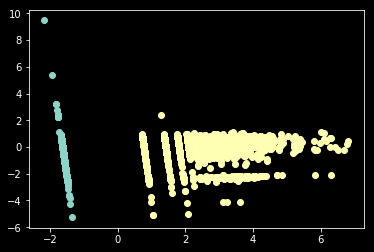

9568
3


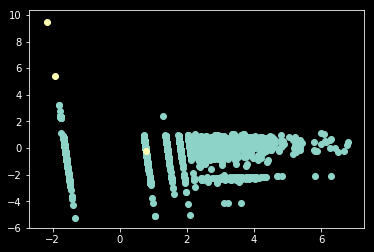

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_kddcup99
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# change plt style
plt.style.use('dark_background')

# load datasets
kdd_datasets = fetch_kddcup99(subset="smtp")
# dim reduction by PCA
pca = PCA(n_components=2)
X = pca.fit_transform(kdd_datasets.data)

# define cluster and calc cluster center
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# clustering datasets
C = [[], []]
for x_part in X:
    x_part = x_part.reshape((1, x_part.shape[0]))
    C[kmeans.predict(x_part)[0]].append(x_part.tolist()[0])

# plot predict data
for c_part in C:
    if len(c_part) > 0:
        c_x, c_y = zip(*c_part)
        plt.scatter(c_x, c_y)

plt.legend()
plt.show()

# plot answer data
C_ans = [[normal_data for i, normal_data in enumerate(X) if kdd_datasets.target[i] == b'normal.'],
         [normal_data for i, normal_data in enumerate(X) if kdd_datasets.target[i] != b'normal.']]

# plot predict data
for c_part in C_ans:
    print(len(c_part))
    if len(c_part) > 0:
        c_x, c_y = zip(*c_part)
        plt.scatter(c_x, c_y)

plt.legend()
plt.show()

## ここまでの所感
$k$-meansでは異常値を適切にクラスタリングできないように思う．  
異常値がクラスタとして十分な個数まとまって存在する必要がある．